Dataset: E-Commerce Shipping Data from Kaggle: https://www.kaggle.com/prachi13/customer-analytics

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
import pickle

ID: ID Number of Customers.

• Warehouse block: The Company has a big Warehouse which is divided into blocks A,B,C,D,E.

• Mode of shipment: The Company ships the products in multiple ways such as Ship, Flight and Road.

• Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

• Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

• Cost of the product: Cost of the Product in US Dollars.

• Prior purchases: The Number of Prior Purchase.

• Product importance: The company has categorized the product in the various parameter such as low, medium, high.

• Gender: Male and Female.

• Discount offered: Discount offered on that specific product.

• Weight in gms: It is the weight in grams.

• Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 
indicates it has reached on time.

# Wrangle Data

In [2]:
def wrangle(filepath):
    
    # Load data
    df = pd.read_csv(filepath, index_col="ID")
    
    # Switch binary values in target variable
    mask = df["Reached.on.Time_Y.N"] == 1
    df.loc[mask, "Reached_on_time"] = 0
    df.loc[~mask, "Reached_on_time"] = 1
    
    # Drop redundant columns
    df.drop(columns=["Reached.on.Time_Y.N"], inplace=True)
    
    return df

In [3]:
df = wrangle("shipping_data.csv")

In [4]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,0.0
2,F,Flight,4,5,216,2,low,M,59,3088,0.0
3,A,Flight,2,2,183,4,low,M,48,3374,0.0
4,B,Flight,3,3,176,4,medium,M,10,1177,0.0
5,C,Flight,2,2,184,3,medium,F,46,2484,0.0


In [5]:
df.shape

(10999, 11)

In [6]:
df.to_csv(r"dash_ready_data.csv")

# Split Data

In [7]:
X = df.drop(columns="Reached_on_time")
y = df["Reached_on_time"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Establish Baseline

In [9]:
baseline_accuracy = y.value_counts(normalize=True).max()
baseline_accuracy

0.5966906082371125

In [80]:
X["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

# Build Model

In [10]:
# Logistic Regression
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                     'Product_importance', 'Gender'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [11]:
# Random Forest Classifier
model_rfc = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

model_rfc.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                      'Product_importance', 'Gender'],
                                mapping=[{'col': 'Warehouse_block',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                         {'col': 'Mode_of_Shipment',
                                          'data_type': dtype('O'),
                                          'mapping': Ship      1
Flight    2
Road      3
NaN      -2
dtype: int64},
                                         {'col': 'Product_importance',
                                          'data_type': dtype('O'),
                                          'mapping': low       1
medium    2
high      3
NaN      -2
dtype: int64},
                                         {'col': 'Gend

In [12]:
# Gradient Boosting Classifier
model_gbc = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

model_gbc.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                      'Product_importance', 'Gender'],
                                mapping=[{'col': 'Warehouse_block',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                         {'col': 'Mode_of_Shipment',
                                          'data_type': dtype('O'),
                                          'mapping': Ship      1
Flight    2
Road      3
NaN      -2
dtype: int64},
                                         {'col': 'Product_importance',
                                          'data_type': dtype('O'),
                                          'mapping': low       1
medium    2
high      3
NaN      -2
dtype: int64},
                                         {'col': 'Gend

# Check Metrics

In [13]:
# Out of the box score
print("Logistic Regression Accuracy (Train): ", model_lr.score(X_train, y_train))
print("Logistic Regression Accuracy (Test): ", model_lr.score(X_test, y_test))

Logistic Regression Accuracy (Train):  0.6407546312080918
Logistic Regression Accuracy (Test):  0.644090909090909


In [14]:
# Out of the box score
print("Random Forest Accuracy (Train): ", model_rfc.score(X_train, y_train))
print("Random Forest Accuracy (Test): ", model_rfc.score(X_test, y_test))

Random Forest Accuracy (Train):  1.0
Random Forest Accuracy (Test):  0.6631818181818182


In [15]:
# Out of the box score
print("Gradient Boosting Accuracy (Train): ", model_gbc.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", model_gbc.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7140584157290601
Gradient Boosting Accuracy (Test):  0.6836363636363636


# Tune Parameters

• permutation importance

In [16]:
param_grid = {
    "gradientboostingclassifier__loss": ["deviance", "exponential"],
    "gradientboostingclassifier__n_estimators": [100, 200, 300],
    "gradientboostingclassifier__criterion": ["friedman_mse", "mse"],
    "gradientboostingclassifier__max_depth": [3, 5, 8, 10]
}

In [17]:
# RandomizedSearchCV

model_gbc_rs = RandomizedSearchCV(model_gbc,
                                  param_distributions=param_grid,
                                  n_jobs=-1, 
                                  cv=3, 
                                  verbose=5)

model_gbc_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['Warehouse_block',
                                                                   'Mode_of_Shipment',
                                                                   'Product_importance',
                                                                   'Gender'],
                                                             mapping=[{'col': 'Warehouse_block',
                                                                       'data_type': dtype('O'),
                                                                       'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                                                      {'col': 'Mode_of_Shipment',
                                                                       'data_type': dtype('O'),
                                 

In [18]:
model_gbc_rs.best_params_

{'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__criterion': 'friedman_mse'}

In [19]:
best_model_rs = model_gbc_rs.best_estimator_

In [20]:
# GridSearchCV

model_gbc_gs = GridSearchCV(model_gbc,
                            param_grid=param_grid,
                            n_jobs=-1,
                            cv=3,
                            verbose=5)

model_gbc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['Warehouse_block',
                                                             'Mode_of_Shipment',
                                                             'Product_importance',
                                                             'Gender'],
                                                       mapping=[{'col': 'Warehouse_block',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                                                {'col': 'Mode_of_Shipment',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': Ship      1
Flight    2

In [21]:
model_gbc_gs.best_params_

{'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 100}

In [22]:
best_model_gs = model_gbc_gs.best_estimator_

In [23]:
# Scores before Tuning
print("Gradient Boosting Accuracy (Train): ", model_gbc.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", model_gbc.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7140584157290601
Gradient Boosting Accuracy (Test):  0.6836363636363636


In [24]:
# Scores after RandomizedSearchCV
print("Gradient Boosting Accuracy (Train): ", best_model_rs.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", best_model_rs.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7136038186157518
Gradient Boosting Accuracy (Test):  0.6859090909090909


In [25]:
# Scores after GridSearchCV
print("Gradient Boosting Accuracy (Train): ", best_model_gs.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", best_model_gs.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7136038186157518
Gradient Boosting Accuracy (Test):  0.6859090909090909


In [103]:
X.iloc[0]

Warehouse_block             D
Mode_of_Shipment       Flight
Customer_care_calls         4
Customer_rating             2
Cost_of_the_Product       177
Prior_purchases             3
Product_importance        low
Gender                      F
Discount_offered           44
Weight_in_gms            1233
Name: 1, dtype: object

In [93]:
input_arr = np.array([["D", "Flight", 4, 2, 177, 3, "low", "F", 44, 1233]])
input_arr

array([['D', 'Flight', '4', '2', '177', '3', 'low', 'F', '44', '1233']],
      dtype='<U21')

In [102]:
inp_df = pd.DataFrame(data=input_arr, columns=X.columns)
inp_df

ValueError: Shape of passed values is (10, 1), indices imply (10, 10)

In [97]:
best_model_gs.predict(inp_df)

array([0.])

In [98]:
best_model_gs.predict_proba(inp_df)

array([[9.99700404e-01, 2.99595613e-04]])

In [26]:
best_model_gs.predict(X_test)

array([0., 1., 1., ..., 1., 0., 1.])

In [53]:
weight_list = X_test["Weight_in_gms"].values.tolist()
weight_list

[2053,
 5572,
 4042,
 4672,
 2419,
 4208,
 3545,
 1597,
 5716,
 5950,
 4458,
 5826,
 1048,
 1156,
 1107,
 2919,
 3958,
 1752,
 1978,
 1668,
 2990,
 4499,
 5352,
 4729,
 5221,
 1981,
 4407,
 5724,
 1210,
 4854,
 4829,
 5002,
 1762,
 5502,
 1479,
 1016,
 5070,
 1392,
 4214,
 5486,
 1350,
 2897,
 5884,
 1522,
 1282,
 5638,
 3791,
 5588,
 1262,
 5881,
 3676,
 4041,
 5252,
 4188,
 4392,
 1235,
 5440,
 2424,
 5759,
 5149,
 4366,
 1694,
 1847,
 3833,
 3261,
 5561,
 2414,
 5383,
 5524,
 5332,
 4363,
 5125,
 6102,
 4684,
 4171,
 4557,
 4535,
 1429,
 1834,
 3837,
 4339,
 4204,
 4640,
 2597,
 2529,
 1872,
 5659,
 1261,
 5516,
 1541,
 4754,
 4312,
 5113,
 5825,
 1194,
 5150,
 1601,
 5711,
 1005,
 5173,
 5139,
 3189,
 3100,
 4012,
 5802,
 1504,
 4522,
 5004,
 1304,
 4129,
 4432,
 1417,
 5691,
 1694,
 5275,
 3443,
 4682,
 2792,
 3506,
 4504,
 1946,
 2195,
 5660,
 4690,
 3755,
 1419,
 2048,
 4491,
 4433,
 2300,
 2551,
 5433,
 5505,
 1620,
 5299,
 5671,
 5734,
 3473,
 5740,
 5496,
 3840,
 4380,
 4785,

In [41]:
proba = best_model_gs.predict_proba(X_test)
proba

array([[9.99900713e-01, 9.92866700e-05],
       [4.20135696e-01, 5.79864304e-01],
       [4.22807483e-01, 5.77192517e-01],
       ...,
       [4.38687666e-01, 5.61312334e-01],
       [7.33194229e-01, 2.66805771e-01],
       [4.17885959e-01, 5.82114041e-01]])

In [ ]:
X_test

In [66]:
proba_data = proba[:,:1]
proba_data
proba_list = [proba_data[i][0] for i in range(len(proba_data))]
proba_list;

In [71]:
data = {"Weight_in_gms": weight_list, "proba_late": proba_list}
df_proba = pd.DataFrame(data=data)
df_proba.head()

,Weight_in_gms,proba_late
0,2053,0.999901
1,5572,0.420136
2,4042,0.422807
3,4672,0.396059
4,2419,0.999888


TypeError: 'str' object is not callable

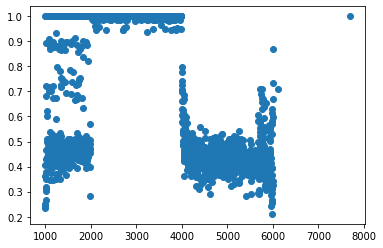

In [76]:
plt.scatter(x=df_proba["Weight_in_gms"], y=df_proba["proba_late"])
plt.xlabel("Weight_in_gms")
plt.ylabel("proba_late")
plt.show()

In [88]:
df["Weight_in_gms"].value_counts()

4883    12
1145    10
4741    10
5783    10
4314    10
        ..
2597     1
4630     1
2573     1
2557     1
2047     1
Name: Weight_in_gms, Length: 4034, dtype: int64

# Communicate Results

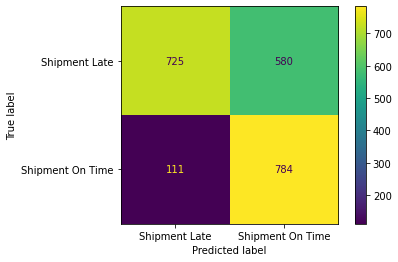

In [27]:
# CONFUSION MATRIX
plot_confusion_matrix(best_model_gs, X_test, y_test, values_format=".0f",
                      display_labels=["Shipment Late", "Shipment On Time"])

<AxesSubplot:>

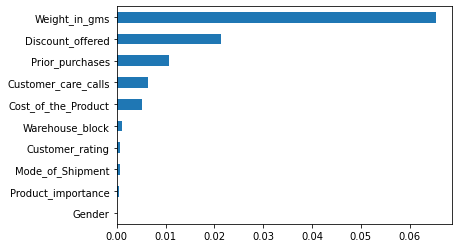

In [28]:
# PERMUTATION IMPORTANCE
perm_imp = permutation_importance(best_model_gs, X_test, y_test, n_repeats=10,
                                  n_jobs=-1, random_state=42)

data = {"imp_mean": perm_imp["importances_mean"],
        "imp_std": perm_imp["importances_std"]}

df_perm = pd.DataFrame(data, index=X_test.columns).sort_values("imp_mean")

df_perm["imp_mean"].tail(10).plot(kind="barh")

In [29]:
perm_imp["importances_mean"]

array([0.00104545, 0.00063636, 0.00640909, 0.00077273, 0.00527273,
       0.01063636, 0.00040909, 0.00013636, 0.02140909, 0.06531818])

In [30]:
df_perm

,imp_mean,imp_std
Gender,0.000136,0.000355
Product_importance,0.000409,0.001415
Mode_of_Shipment,0.000636,0.000506
Customer_rating,0.000773,0.002995
Warehouse_block,0.001045,0.001186
Cost_of_the_Product,0.005273,0.004636
Customer_care_calls,0.006409,0.002452
Prior_purchases,0.010636,0.003874
Discount_offered,0.021409,0.005776
Weight_in_gms,0.065318,0.005860


## Pickle Model

In [31]:
filename = "gbc_gs.pk1"
pickle.dump(best_model_gs, open(filename, 'wb'))